In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn

In [4]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.shape

(301, 9)

In [7]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
#check null values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [10]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [12]:
final_dataset['Pres_year']=2022

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Pres_year
0,2014,3.35,5.59,27000,0,0,1,0,1,2022
1,2013,4.75,9.54,43000,0,1,0,0,1,2022
2,2017,7.25,9.85,6900,0,0,1,0,1,2022
3,2011,2.85,4.15,5200,0,0,1,0,1,2022
4,2014,4.60,6.87,42450,0,1,0,0,1,2022


In [14]:
final_dataset['aged']=final_dataset['Pres_year']-final_dataset['Year']

In [15]:
final_dataset=final_dataset.drop(['Year','Pres_year'],axis=1)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,aged
0,3.35,5.59,27000,0,0,1,0,1,8
1,4.75,9.54,43000,0,1,0,0,1,9
2,7.25,9.85,6900,0,0,1,0,1,5
3,2.85,4.15,5200,0,0,1,0,1,11
4,4.60,6.87,42450,0,1,0,0,1,8


In [17]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,aged
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
aged,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


In [18]:
import seaborn as sns

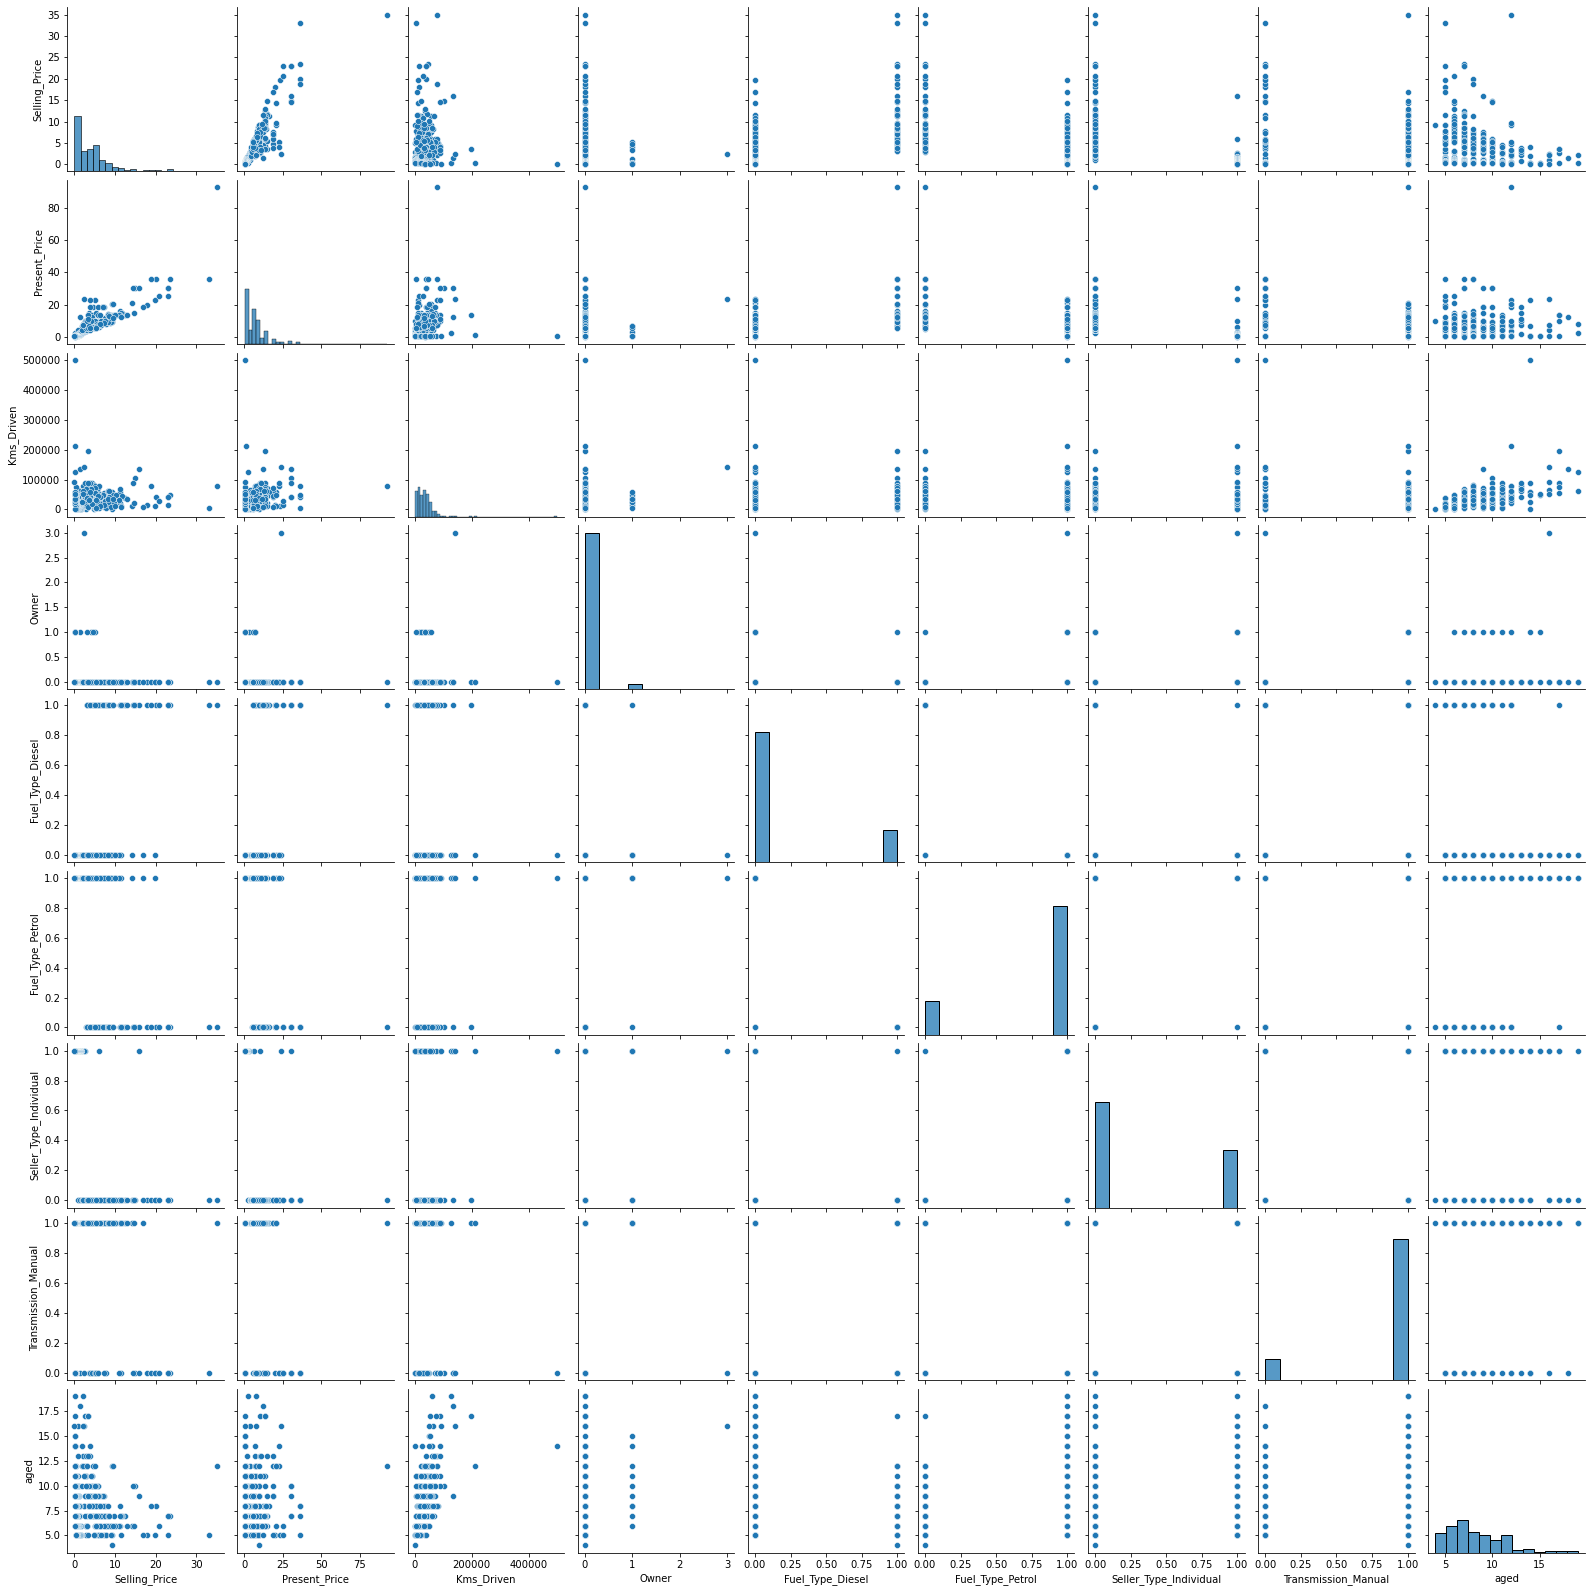

In [19]:
sns.pairplot(final_dataset)

In [20]:
import matplotlib.pyplot as plt

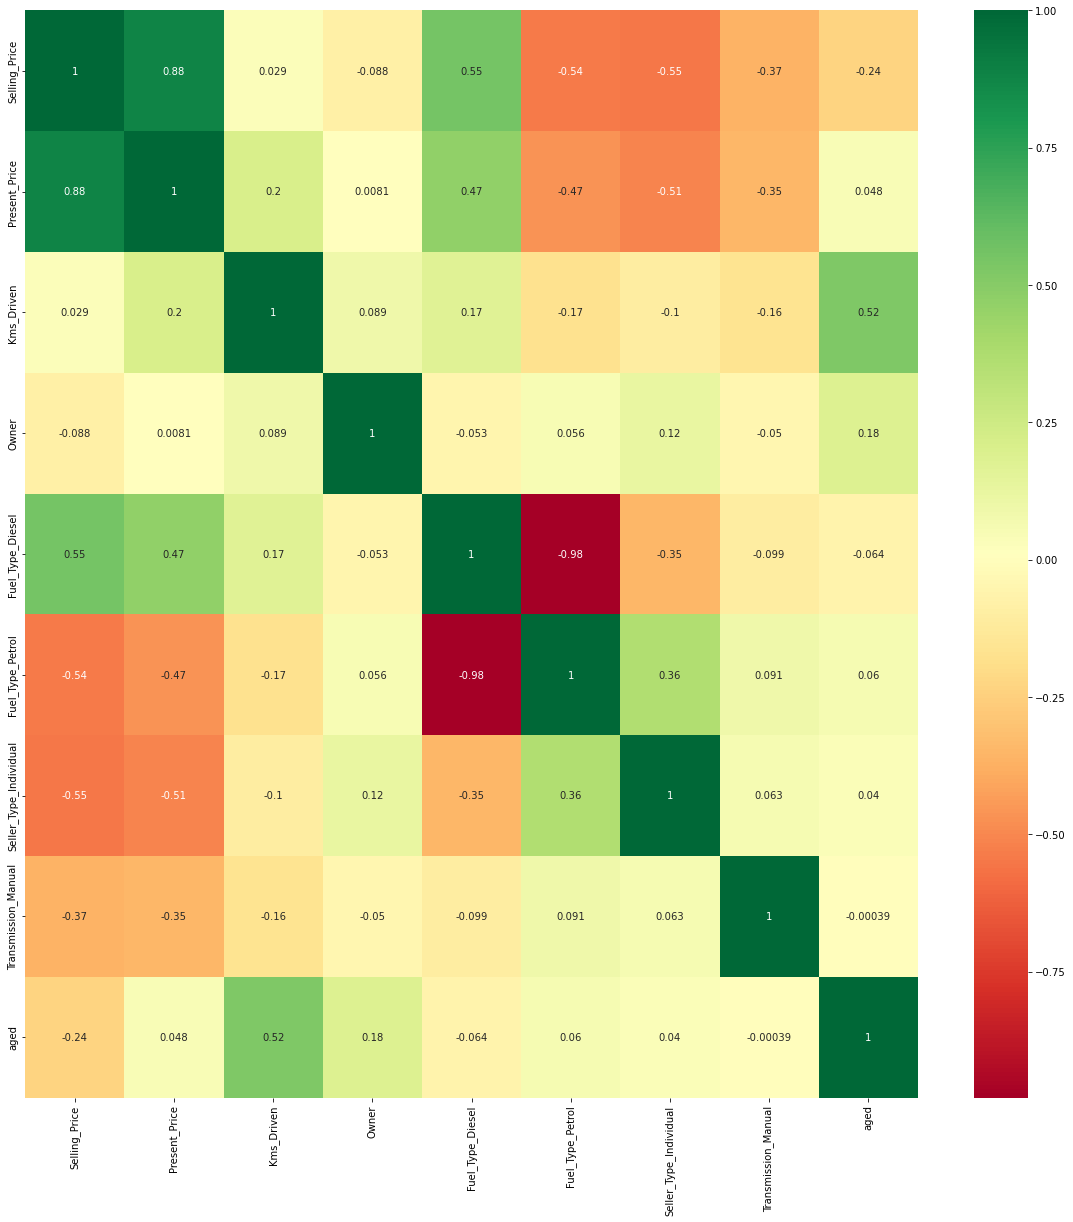

In [21]:
corrmat=final_dataset.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [22]:
#independent and dependent features
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,aged
0,5.59,27000,0,0,1,0,1,8
1,9.54,43000,0,1,0,0,1,9
2,9.85,6900,0,0,1,0,1,5
3,4.15,5200,0,0,1,0,1,11
4,6.87,42450,0,1,0,0,1,8


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
##feature importance
from sklearn.ensemble import ExtraTreesRegressor

In [26]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.3900569  0.03792454 0.00084882 0.22119654 0.01156953 0.12467933
 0.13413787 0.07958647]


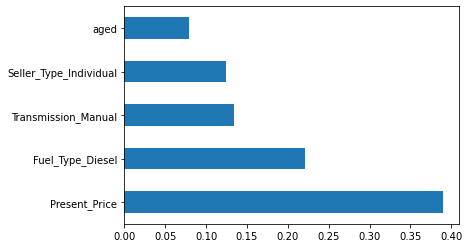

In [28]:
#plot graph of top 5 important features
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
X_train.shape

(240, 8)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_random=RandomForestRegressor()

In [34]:
#hyper parameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

In [36]:
#grid search
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_sample_leaf
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf=RandomForestRegressor()

In [39]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
predictions=rf_random.predict(X_test)

In [42]:
predictions

array([ 2.97853576,  3.04926468, 11.0351922 , 19.73956103, 21.22587539,
        0.49560595,  5.60625355,  0.19219031,  3.85395805,  0.43129519,
        4.83411958, 19.74862936, 10.43578526,  3.47985744,  3.01145431,
        4.84969775,  7.22530834,  0.31123512,  7.18894845,  1.18620965,
        6.50534755,  4.59526375,  5.34512803,  3.57180012, 10.43578526,
        4.22303764,  0.60297307,  5.33441193, 14.98294515,  0.58645885,
        0.26354423, 21.51082072,  5.4848851 ,  7.36024925,  3.33211093,
        1.26549408,  9.06004996,  3.05477408,  0.6869886 ,  0.58198039,
        5.81479113,  5.81495586,  3.83464598,  9.50624012,  5.38583102,
        7.17910331, 20.33017227,  0.61237201,  5.06534181,  0.20365454,
        7.96246809, 10.39478397,  0.44966483,  2.98390763,  6.71887438,
        6.64379627,  5.38726185,  3.96918526,  7.0086234 ,  4.44551361,
        0.70052301])

C:\Users\User\anaconda3\envs\carpred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

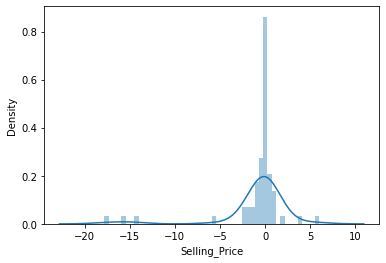

In [43]:
sns.distplot(y_test-predictions)

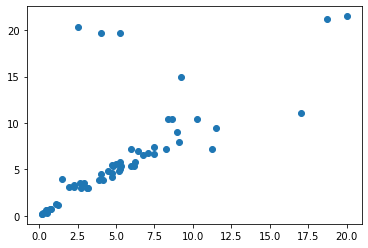

In [44]:
plt.scatter(y_test,predictions)

In [45]:
import pickle
#open a file, where you ant to store the data
file=open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)